In [97]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets


In [98]:
sess=tf.Session()



In [99]:
iris=datasets.load_iris()
x_vals=np.array([[x[0],x[3]] for x in iris.data])
y_vals=np.array([1 if y==0  else -1 for y in iris.target])



In [100]:
def split_train_test_data(x_vals,y_vals):
    train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
    test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
    x_vals_train = x_vals[train_indices]
    x_vals_test = x_vals[test_indices]
    y_vals_train = y_vals[train_indices]
    y_vals_test = y_vals[test_indices]
    return   x_vals_train,x_vals_test,y_vals_train,y_vals_test


In [101]:
x_vals_train,x_vals_test,y_vals_train,y_vals_test=split_train_test_data(x_vals,y_vals)
batch_size=20
x_data=tf.placeholder(shape=[None,2],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)

A=tf.Variable(tf.random_normal(shape=[2,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))

In [102]:
model_output=tf.subtract(tf.matmul(x_data,A),b)

In [103]:
l2_norm=tf.reduce_sum(tf.square(A))
alpha=tf.constant([0.1])
classfication_loss=tf.reduce_mean(tf.maximum(0.,tf.subtract(1.,tf.multiply(y_target,model_output))))
loss=tf.add(classfication_loss,tf.multiply(alpha,l2_norm))


In [104]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [105]:
my_opt=tf.train.GradientDescentOptimizer(0.01)
train_step=my_opt.minimize(loss)

init=tf.initialize_all_variables()
sess.run(init)

In [106]:
loss_vec=[]
train_acc=[]
test_acc=[]
for i in range(1000):
    rand_indexs=np.random.choice(len(x_vals_train),size=batch_size)
    rand_x=x_vals_train[rand_indexs]
    rand_y=np.transpose([y_vals_train[rand_indexs]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    
    temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp= sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp=sess.run(accuracy,feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    if (i+1)%100==0:
     print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
     print('Loss = ' + str(temp_loss))

Step #100 A = [[-0.13408324]
 [-0.8104044 ]] b = [[-1.1471843]]
Loss = [0.4443789]
Step #200 A = [[-0.12625565]
 [-0.9166819 ]] b = [[-1.1941838]]
Loss = [0.36357653]
Step #300 A = [[-0.12901355]
 [-0.9988572 ]] b = [[-1.236184]]
Loss = [0.32625154]
Step #400 A = [[-0.10410502]
 [-1.0572925 ]] b = [[-1.2881835]]
Loss = [0.25579494]
Step #500 A = [[-0.09703889]
 [-1.1239154 ]] b = [[-1.338684]]
Loss = [0.32924485]
Step #600 A = [[-0.11187866]
 [-1.1610688 ]] b = [[-1.3811846]]
Loss = [0.29541528]
Step #700 A = [[-0.10876399]
 [-1.2092563 ]] b = [[-1.4306847]]
Loss = [0.30682558]
Step #800 A = [[-0.099784 ]
 [-1.2466617]] b = [[-1.4821854]]
Loss = [0.318494]
Step #900 A = [[-0.10765461]
 [-1.2701097 ]] b = [[-1.528186]]
Loss = [0.2634983]
Step #1000 A = [[-0.09286406]
 [-1.2864169 ]] b = [[-1.5756863]]
Loss = [0.30753732]


In [107]:
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1
x1_vals = [d[1] for d in x_vals]
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)
    setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==1]
    setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==1]
    not_setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==-1]
    not_setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==-1]



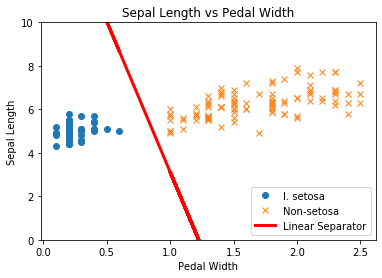

In [108]:
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', 
linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()